### EDA - BCG project
---

The BCG project team thinks that building a churn model to understand whether price sensitivity is the largest driver of churn has potential. The client has sent over some data and the AD wants you to perform some exploratory data analysis.

The data that was sent over includes:

Historical customer data: Customer data such as usage, sign up date, forecasted usage etc
Historical pricing data: variable and fixed pricing data etc
Churn indicator: whether each customer has churned or not


## 1. Importing libraries

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import plotly.express as px

## 2. Loading data

In [174]:
df_client = pd.read_csv('client_data.csv')
pd.set_option('display.max_columns', None)
df_client.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  date_activ    date_end  \
0         0         54946                0  2013-06-15  2016-06-15   
1      4660             0                0  2009-08-21  2016-08-30   
2       544             0                0  2010-04-16  2016-04-16   
3      1584             0                0  2010-03-30  2016-03-30   
4      4425             0              526  2010-01-13  2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0

In [175]:
df_price = pd.read_csv('price_data.csv')
df_price.head()

id  price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745  2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745  2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745  2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745  2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745  2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [176]:
df_price.price_date.unique()

array(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
       '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
       '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
      dtype=object)

# 3. EDA
---

In [177]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              14606 non-null  object 
 1   channel_sales                   14606 non-null  object 
 2   cons_12m                        14606 non-null  int64  
 3   cons_gas_12m                    14606 non-null  int64  
 4   cons_last_month                 14606 non-null  int64  
 5   date_activ                      14606 non-null  object 
 6   date_end                        14606 non-null  object 
 7   date_modif_prod                 14606 non-null  object 
 8   date_renewal                    14606 non-null  object 
 9   forecast_cons_12m               14606 non-null  float64
 10  forecast_cons_year              14606 non-null  int64  
 11  forecast_discount_energy        14606 non-null  float64
 12  forecast_meter_rent_12m         


- We can observe that no columns have any NaN data.
- Columns containing date information are not of the correct Dtype: Because they are saved as objects, I will convert them to datetime.
- `has_gas` should be transform to 0 and 1 values.

In [178]:
df_client.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
dtype: int64

client_data.csv

-	id = client company identifier
-	activity_new = category of the company’s activity
-	channel_sales = code of the sales channel
-	cons_12m = electricity consumption of the past 12 months
-	cons_gas_12m = gas consumption of the past 12 months
-	cons_last_month = electricity consumption of the last month
-	date_activ = date of activation of the contract
-	date_end = registered date of the end of the contract
-	date_modif_prod = date of the last modification of the product
-	date_renewal = date of the next contract renewal
-	forecast_cons_12m = forecasted electricity consumption for next 12 months
-	forecast_cons_year = forecasted electricity consumption for the next calendar year
-	forecast_discount_energy = forecasted value of current discount
-	forecast_meter_rent_12m = forecasted bill of meter rental for the next 2 months
-	forecast_price_energy_off_peak = forecasted energy price for 1st period (off peak)
-	forecast_price_energy_peak = forecasted energy price for 2nd period (peak)
-	forecast_price_pow_off_peak = forecasted power price for 1st period (off peak)
-	has_gas = indicated if client is also a gas client
-	imp_cons = current paid consumption
-	margin_gross_pow_ele = gross margin on power subscription
-	margin_net_pow_ele = net margin on power subscription
-	nb_prod_act = number of active products and services
-	net_margin = total net margin
-	num_years_antig = antiquity of the client (in number of years)
-	origin_up = code of the electricity campaign the customer first subscribed to
-	pow_max = subscribed power
-	churn = has the client churned over the next 3 months


In [179]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  193002 non-null  object 
 1   price_date          193002 non-null  object 
 2   price_off_peak_var  193002 non-null  float64
 3   price_peak_var      193002 non-null  float64
 4   price_mid_peak_var  193002 non-null  float64
 5   price_off_peak_fix  193002 non-null  float64
 6   price_peak_fix      193002 non-null  float64
 7   price_mid_peak_fix  193002 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


price_data.csv

-	id = client company identifier
-	price_date = reference date
-	price_off_peak_var = price of energy for the 1st period (off peak)
-	price_peak_var = price of energy for the 2nd period (peak)
-	price_mid_peak_var = price of energy for the 3rd period (mid peak)
-	price_off_peak_fix = price of power for the 1st period (off peak)
-	price_peak_fix = price of power for the 2nd period (peak)
-	price_mid_peak_fix = price of power for the 3rd period (mid peak)

Note: some fields are hashed text strings. This preserves the privacy of the original data but the commercial meaning is retained and so they may have predictive power


In [180]:
df_client.columns

Index(['id', 'channel_sales', 'cons_12m', 'cons_gas_12m', 'cons_last_month',
       'date_activ', 'date_end', 'date_modif_prod', 'date_renewal',
       'forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy',
       'forecast_meter_rent_12m', 'forecast_price_energy_off_peak',
       'forecast_price_energy_peak', 'forecast_price_pow_off_peak', 'has_gas',
       'imp_cons', 'margin_gross_pow_ele', 'margin_net_pow_ele', 'nb_prod_act',
       'net_margin', 'num_years_antig', 'origin_up', 'pow_max', 'churn'],
      dtype='object')

In [181]:
df_client["date_activ"] = pd.to_datetime(df_client["date_activ"], format='%Y-%m-%d')
df_client["date_end"] = pd.to_datetime(df_client["date_end"], format='%Y-%m-%d')
df_client["date_modif_prod"] = pd.to_datetime(df_client["date_modif_prod"], format='%Y-%m-%d')
df_client["date_renewal"] = pd.to_datetime(df_client["date_renewal"], format='%Y-%m-%d')
df_price["price_date"] = pd.to_datetime(df_price["price_date"], format='%Y-%m-%d')

In [182]:
df_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14606 entries, 0 to 14605
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14606 non-null  object        
 1   channel_sales                   14606 non-null  object        
 2   cons_12m                        14606 non-null  int64         
 3   cons_gas_12m                    14606 non-null  int64         
 4   cons_last_month                 14606 non-null  int64         
 5   date_activ                      14606 non-null  datetime64[ns]
 6   date_end                        14606 non-null  datetime64[ns]
 7   date_modif_prod                 14606 non-null  datetime64[ns]
 8   date_renewal                    14606 non-null  datetime64[ns]
 9   forecast_cons_12m               14606 non-null  float64       
 10  forecast_cons_year              14606 non-null  int64         
 11  fo

In [183]:
df_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   id                  193002 non-null  object        
 1   price_date          193002 non-null  datetime64[ns]
 2   price_off_peak_var  193002 non-null  float64       
 3   price_peak_var      193002 non-null  float64       
 4   price_mid_peak_var  193002 non-null  float64       
 5   price_off_peak_fix  193002 non-null  float64       
 6   price_peak_fix      193002 non-null  float64       
 7   price_mid_peak_fix  193002 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 11.8+ MB


In [184]:
df_client["has_gas"]= df_client["has_gas"].replace({"t":1,"f":0})

In [185]:
df_client.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701        1      0.00                 25.44   
1                    44.311378        0      0.00                 16.38   
2                    44.311378        0      0.00                 28.60   
3                    44.311378        0      0.00                 30.22   
4                    40.606701        0     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  churn  
0  lxidpiddsbxsbosboudacockeimpuepw   43.648      1  
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800      0  
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856      0  
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200      0  
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800      0

### Making use of descriptive statistics
---

In [186]:
df_client.describe(include = [np.number])

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460600e+04  1.460600e+04     14606.000000       14606.000000   
mean   1.592203e+05  2.809238e+04     16090.269752        1868.614880   
std    5.734653e+05  1.629731e+05     64364.196422        2387.571531   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674750e+03  0.000000e+00         0.000000         494.995000   
50%    1.411550e+04  0.000000e+00       792.500000        1112.875000   
75%    4.076375e+04  0.000000e+00      3383.000000        2401.790000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14606.000000              14606.000000             14606.000000   
mean          1399.762906                  0.966726                63.086871   
std           3247.786255                  5.108289                66.165783   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.795000   
75%           1745.750000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14606.000000                14606.000000   
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak       has_gas      imp_cons  \
count                 14606.000000  14606.000000  14606.000000   
mean                     43.130056      0.181501    152.786896   
std                       4.485988      0.385446    341.369366   
min                       0.000000      0.000000      0.000000   
25%                      40.606701      0.000000      0.000000   
50%                      44.311378      0.000000     37.395000   
75%                      44.311378      0.000000    193.980000   
max                      59.266378      1.000000  15042.790000   

       margin_gross_pow_ele  margin_net_pow_ele   nb_prod_act    net_margin  \
count          14606.000000        14606.000000  14606.000000  14606.000000   
mean              24.565121           24.562517      1.292346    189.264522   
std               20.231172           20.230280      0.709774    311.798130   
min                0.000000            0.000000      1.000000      0.000000   
25%               14.280000           14.280000      1.000000     50.712500   
50%               21.640000           21.640000      1.000000    112.530000   
75%               29.880000           29.880000      1.000000    243.097500   
max              374.640000          374.640000     32.000000  24570.650000   

       num_years_antig       pow_max         churn  
count     14606.000000  14606.000000  14606.000000  
mean          4.997809     18.135136      0.097152  
std           1.611749     13.534743      0.296175  
min           1.000000      3.300000      0.000000  
25%           4.000000     12.500000      0.000000  
50%           5.000000     13.856000      0.000000  
75%           6.000000     19.172500      0.000000  
max          13.000000    320.000000      1.000000

In [187]:
df_price.describe(include = [np.number])

price_off_peak_var  price_peak_var  price_mid_peak_var  \
count       193002.000000   193002.000000       193002.000000   
mean             0.141027        0.054630            0.030496   
std              0.025032        0.049924            0.036298   
min              0.000000        0.000000            0.000000   
25%              0.125976        0.000000            0.000000   
50%              0.146033        0.085483            0.000000   
75%              0.151635        0.101673            0.072558   
max              0.280700        0.229788            0.114102   

       price_off_peak_fix  price_peak_fix  price_mid_peak_fix  
count       193002.000000   193002.000000       193002.000000  
mean            43.334477       10.622875            6.409984  
std              5.410297       12.841895            7.773592  
min              0.000000        0.000000            0.000000  
25%             40.728885        0.000000            0.000000  
50%             44.266930        0.000000            0.000000  
75%             44.444710       24.339581           16.226389  
max             59.444710       36.490692           17.458221

### The prices in columns `price_peak_fix` and `price_mid_peak_fix` have a considerable standard deviation, as can be seen.

# 4. Visualizing churn distribution
---


### 9.7% of churn is a normal number for this market? Is it excessively high? We need to investigate.

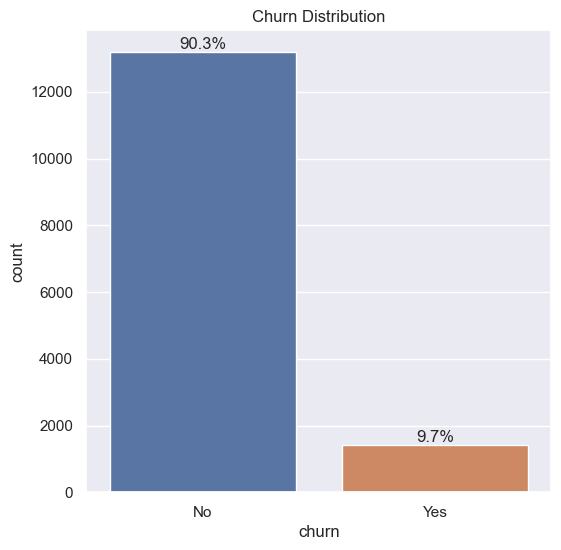

In [188]:
plot = sns.countplot(x = 'churn', data = df_client)
plot.set_title('Churn Distribution')
plot.set_xticklabels(['No', 'Yes'])
total = len(df_client)
for p in plot.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    plot.annotate(percentage, (x, y), ha='center', va='bottom', fontsize=12)
plt.show()

### Visualizing correlations

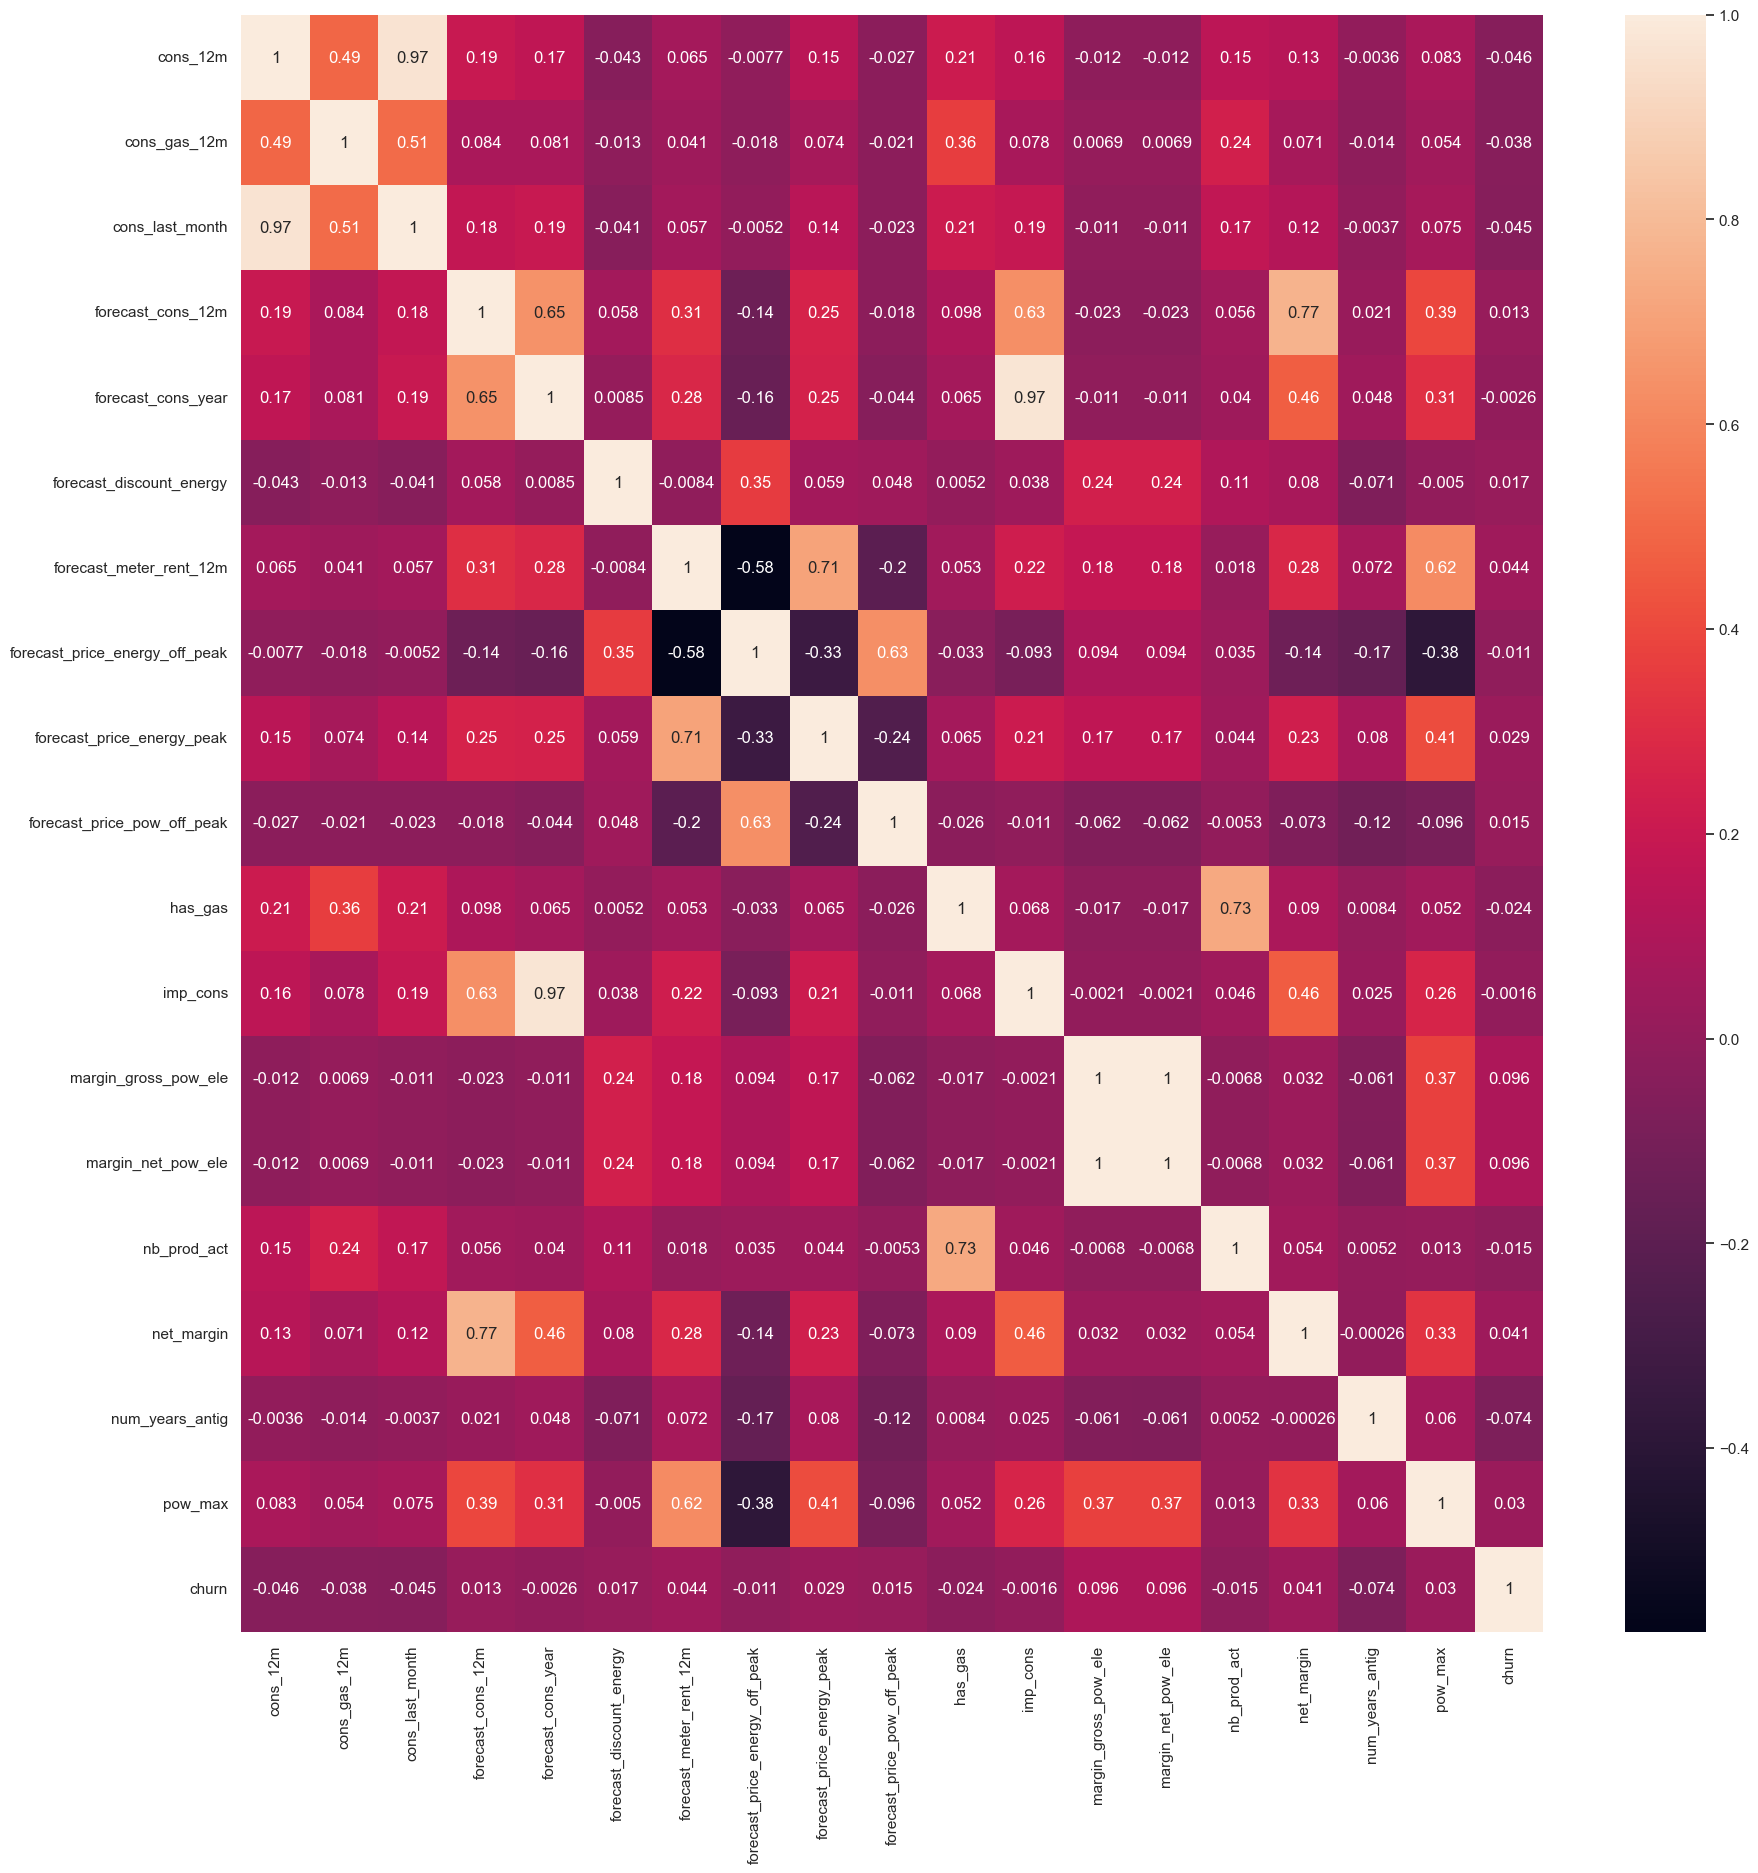

In [200]:
numeric_columns_client = df_client.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns_client.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.rcParams['figure.figsize'] = [20, 20]
plt.show()


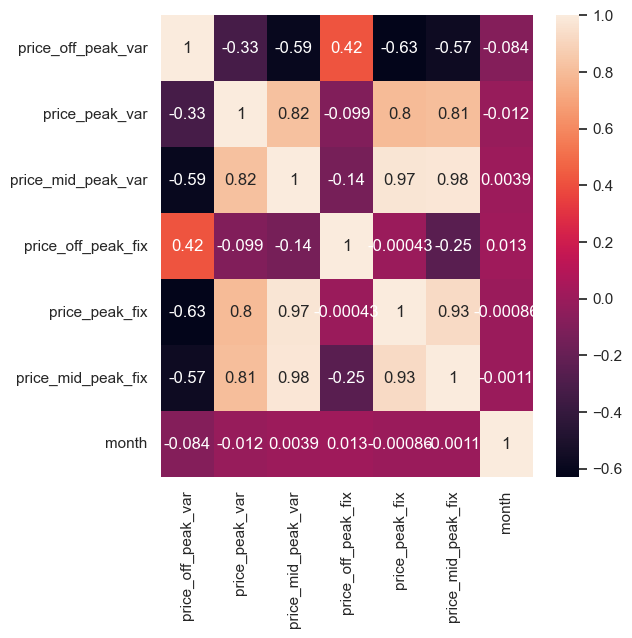

In [198]:
numeric_columns_price = df_price.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns_price.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

### Variables distributions

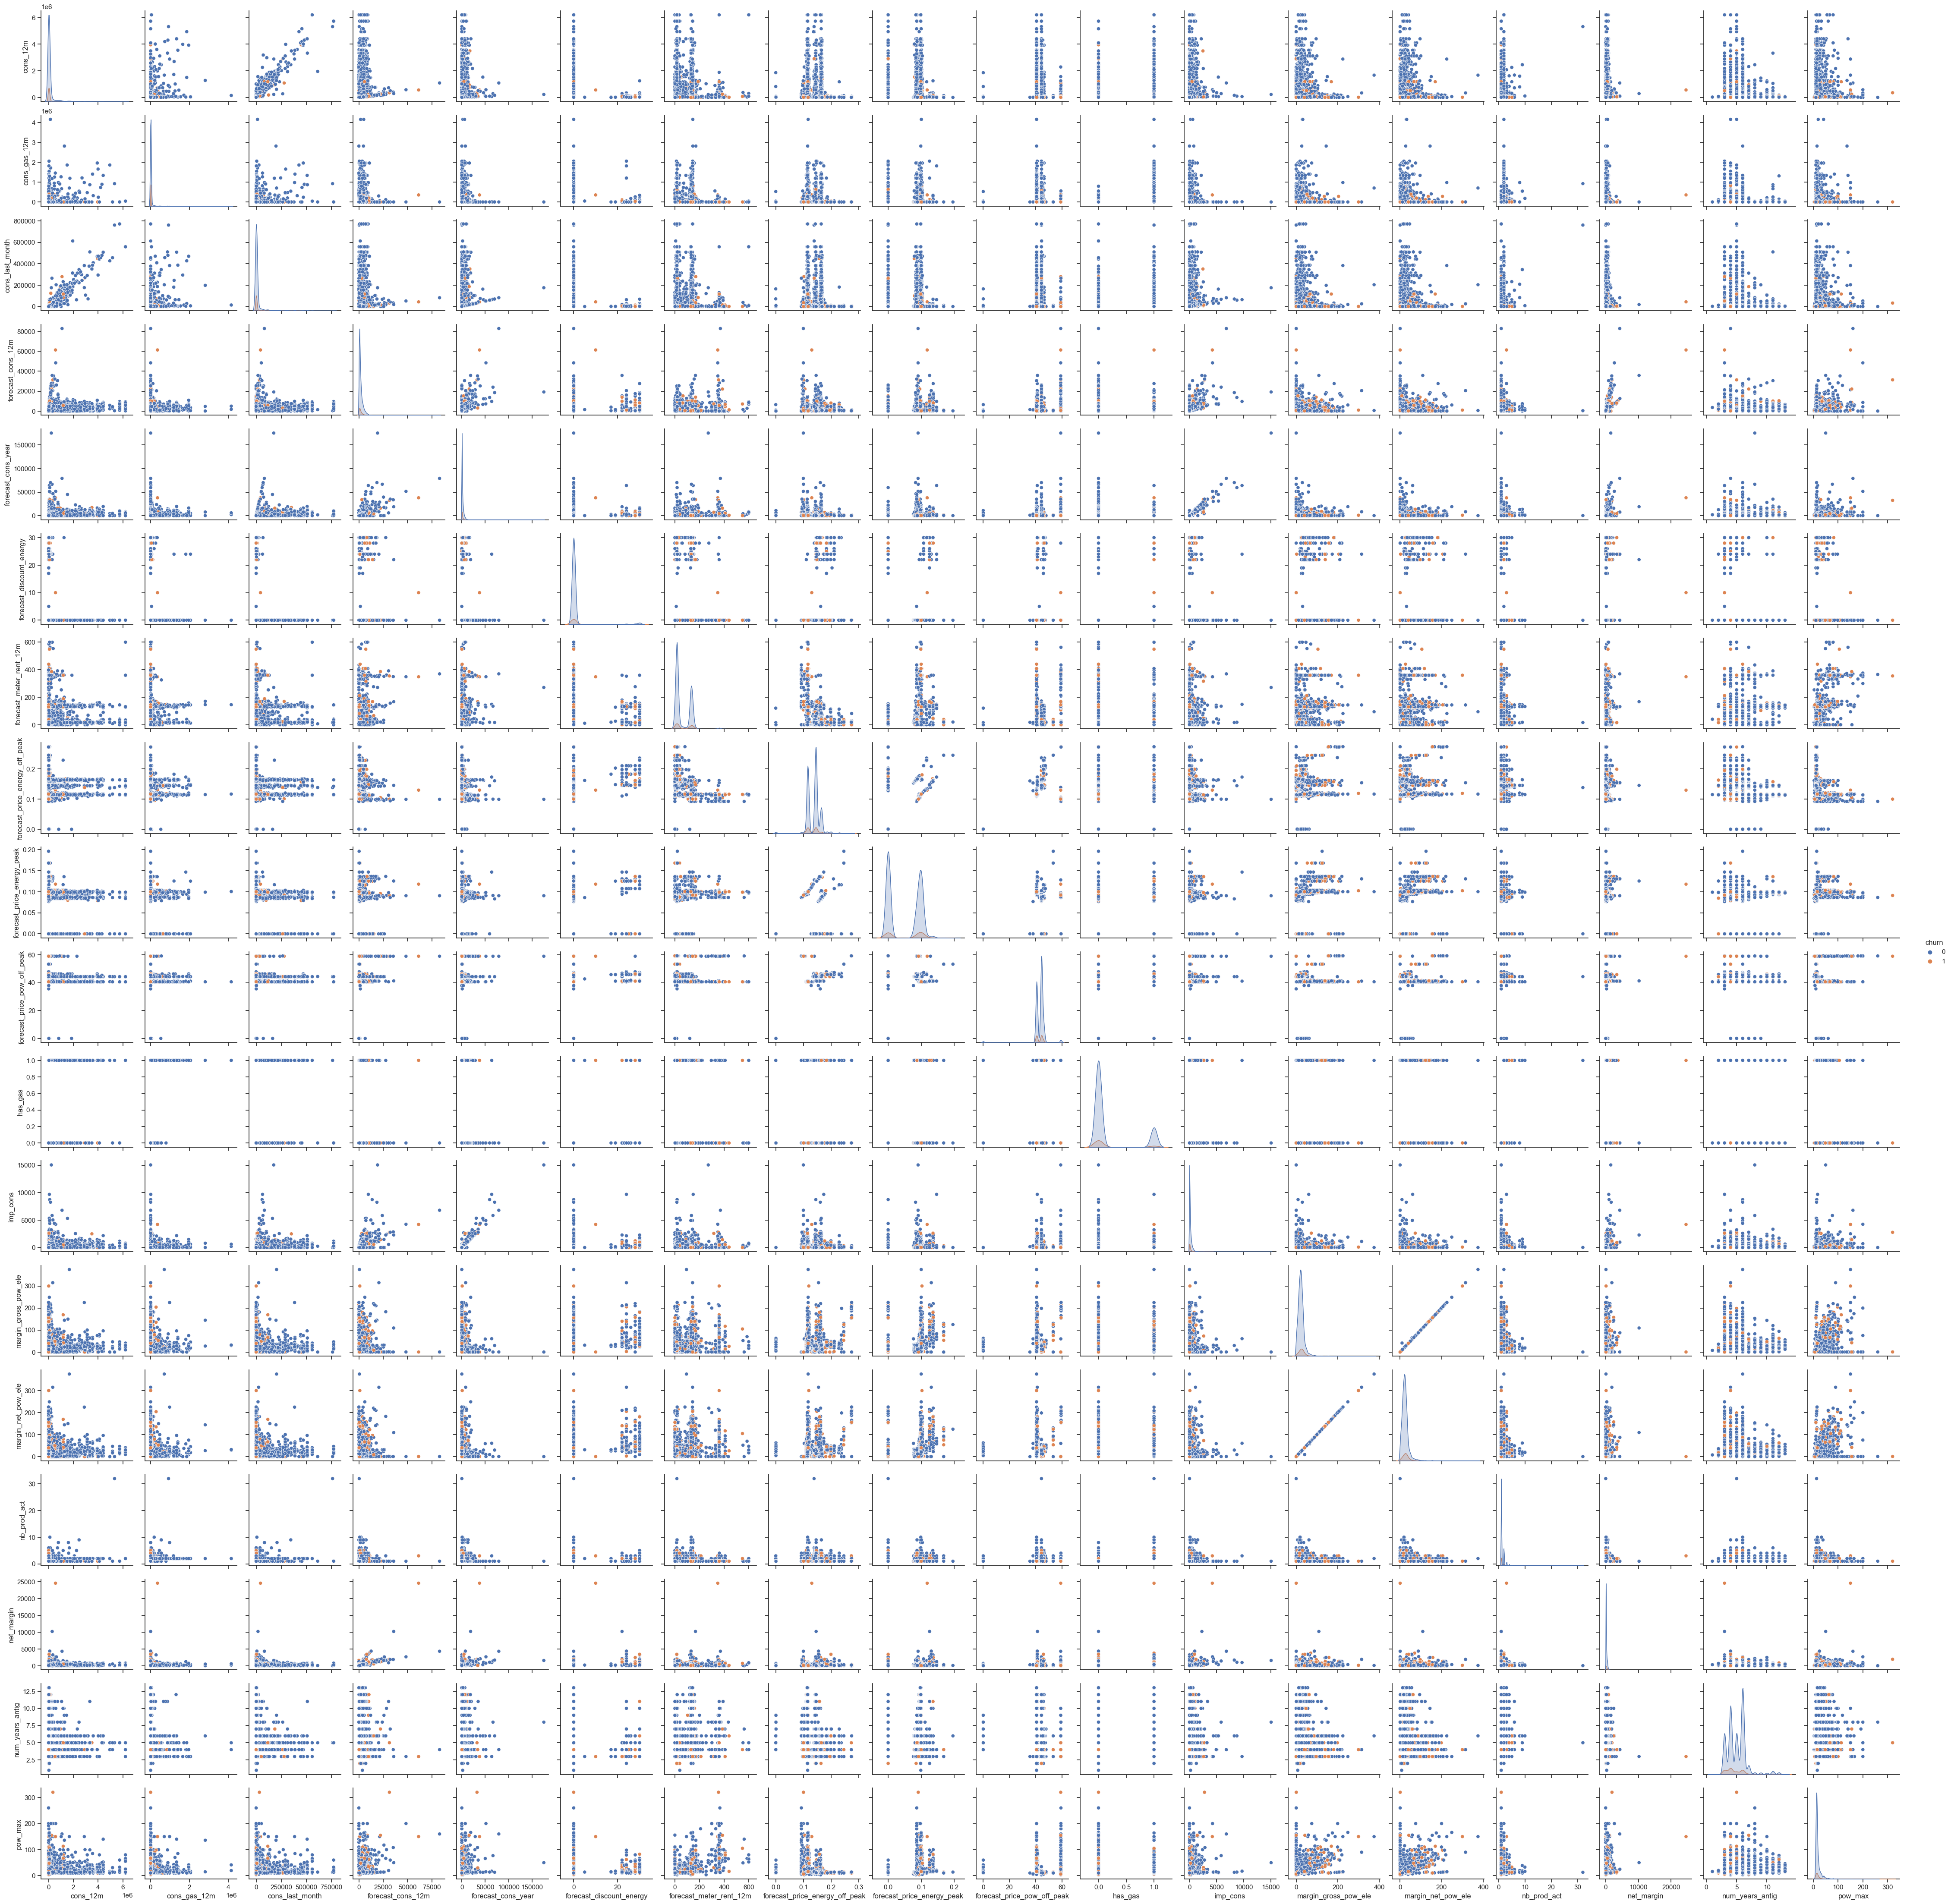

In [191]:
sns.set_theme(style="ticks")
sns.pairplot(df_client, hue="churn")

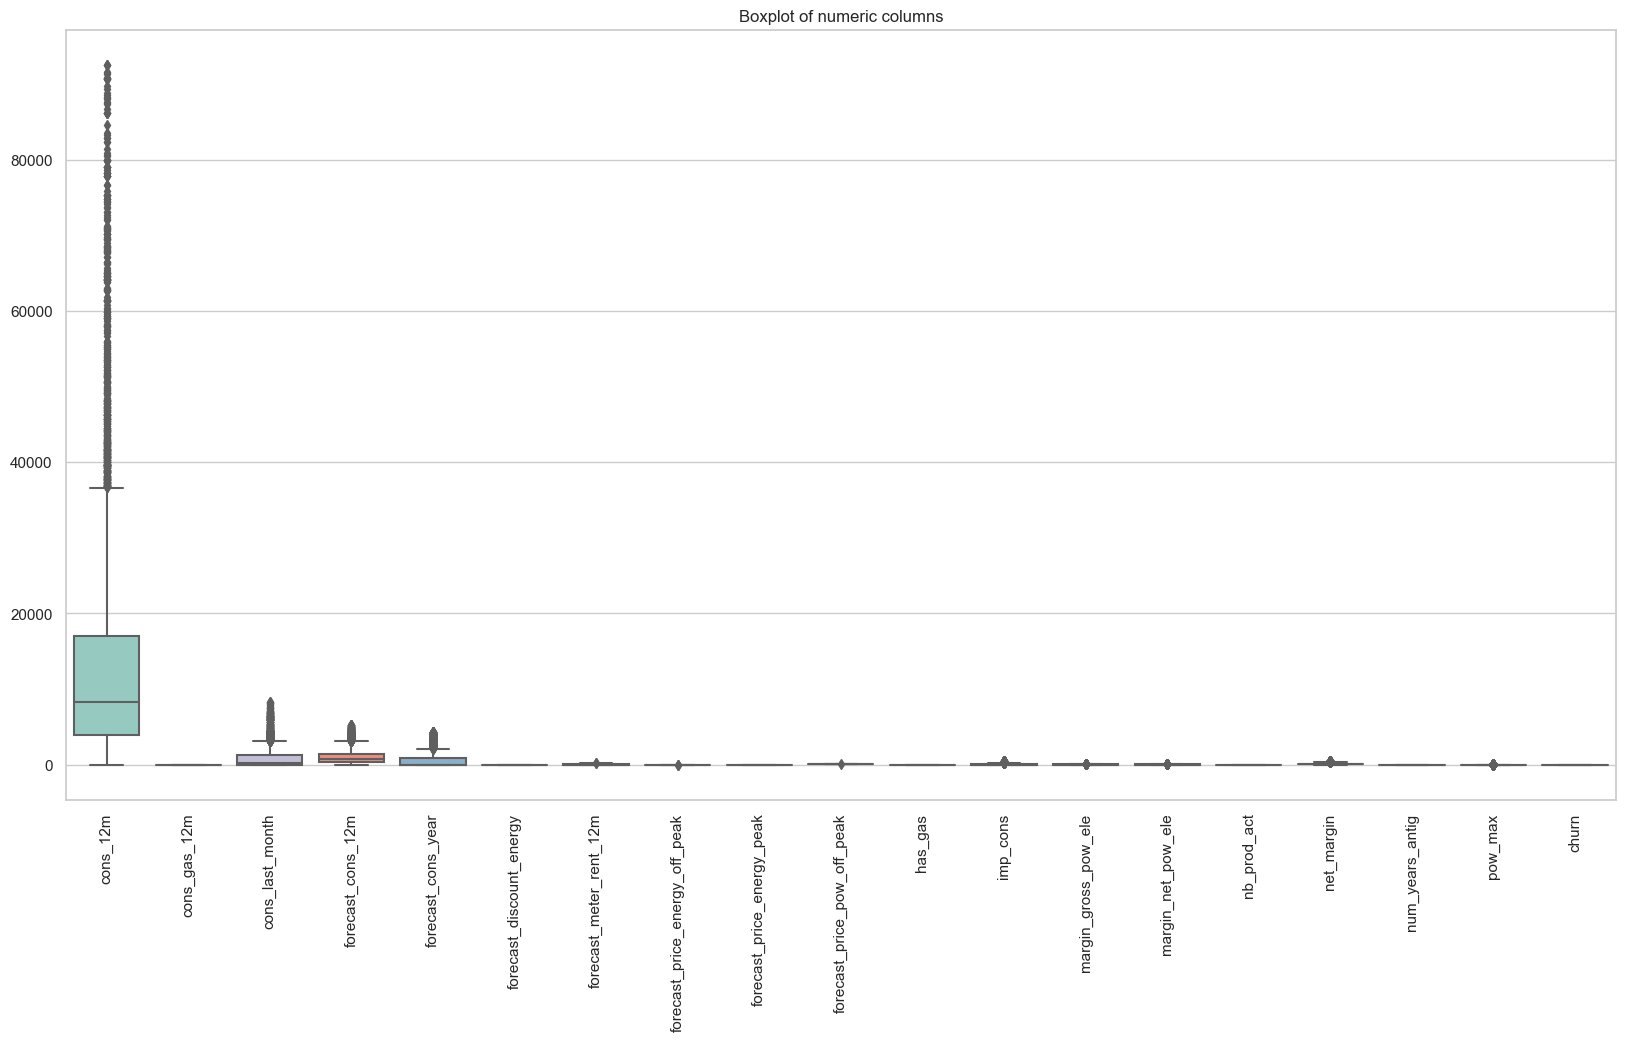

In [192]:

# Identify quarters to calculate IQR
Q1 = numeric_columns_client.quantile(0.25)
Q3 = numeric_columns_client.quantile(0.75)
IQR = Q3 - Q1

# Set limits for outliers identification
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Excludes outliers
numeric_columns_client = numeric_columns_client[~((numeric_columns_client < lower_bound) | (numeric_columns_client > upper_bound)).any(axis=1)]

# Defina estilo do Seaborn
sns.set_theme(style="whitegrid")

# Create a boxplot of numerical variables with informative colors
plt.figure(figsize=(20, 10))
sns.boxplot(data=numeric_columns_client, palette="Set3")
plt.title('Boxplot of numeric columns')
plt.xticks(rotation=90)
plt.show()


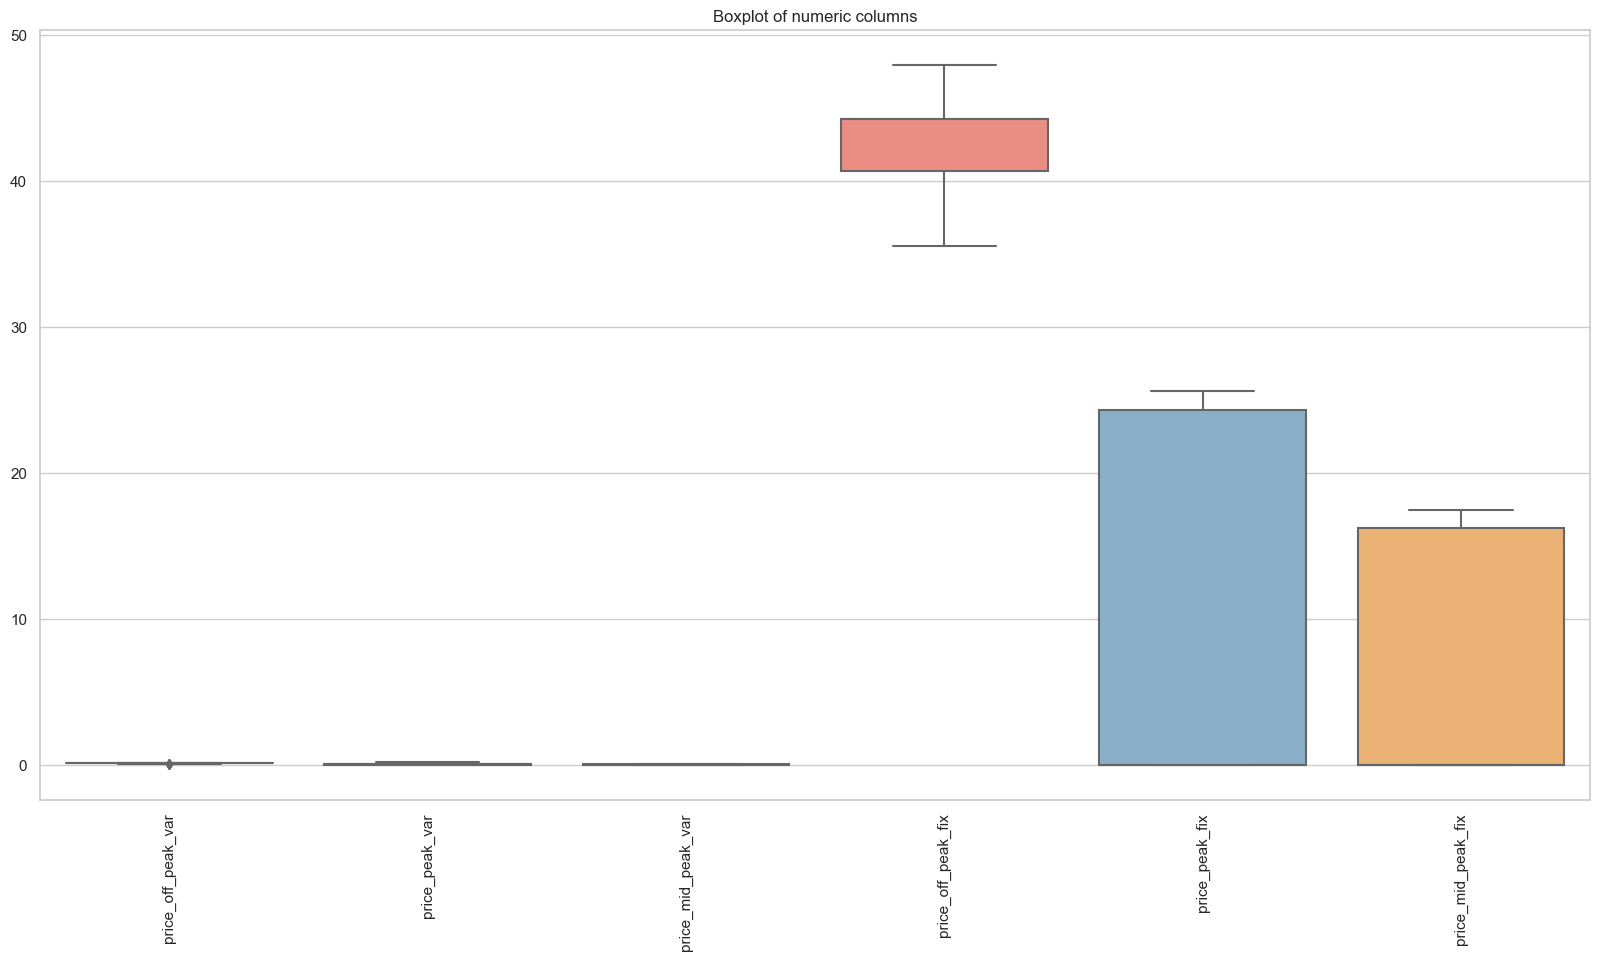

In [193]:

# Identify quarters to calculate IQR
Q1 = numeric_columns_price.quantile(0.25)
Q3 = numeric_columns_price.quantile(0.75)
IQR = Q3 - Q1

# Set limits for outliers identification
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Excludes outliers
numeric_columns_price = numeric_columns_price[~((numeric_columns_price < lower_bound) | (numeric_columns_price > upper_bound)).any(axis=1)]

sns.set_theme(style="whitegrid")

# Create a boxplot of numerical variables with informative colors
plt.figure(figsize=(20, 10))
sns.boxplot(data=numeric_columns_price, palette="Set3")
plt.title('Boxplot of numeric columns')
plt.xticks(rotation=90)

plt.show()

# 5. Verifying the hypothesis of price sensitivity being to some extent correlated with churn
---

<Axes: xlabel='forecast_discount_energy', ylabel='forecast_cons_year'>

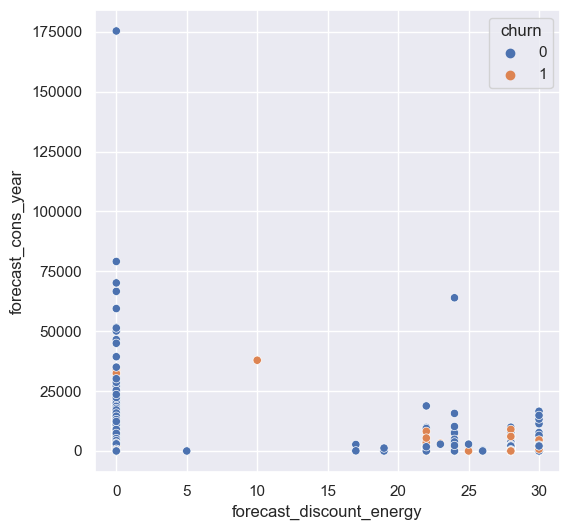

In [194]:
sns.set_theme(style="darkgrid")
sns.scatterplot( y = "forecast_cons_year", x = "forecast_discount_energy", data = df_client, hue = "churn")

## The graphic shows that the highest rate of churn is connected with consumers who already receive the biggest discounts. As a result, we believe that offering discounts will not alleviate the turnover problem.

In [195]:
df_price["month"] = df_price["price_date"].dt.month

In [196]:
df_price.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  month  
0                 0.0      1  
1                 0.0      2  
2                 0.0      3  
3                 0.0      4  
4                 0.0      5

# Price x Months

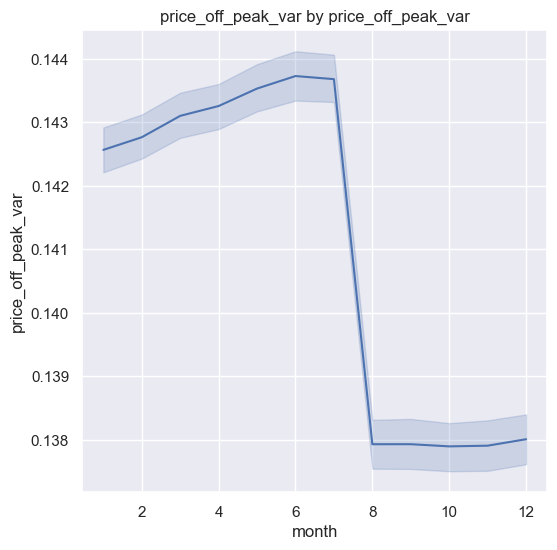

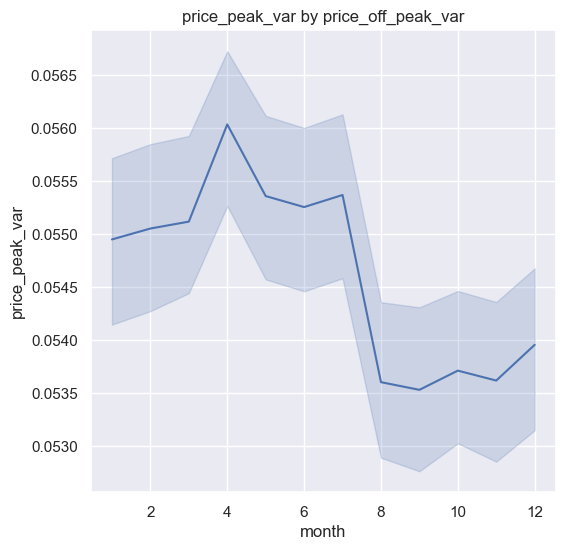

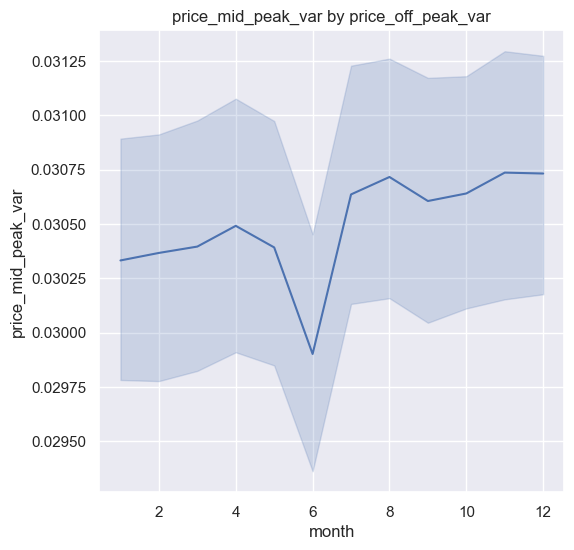

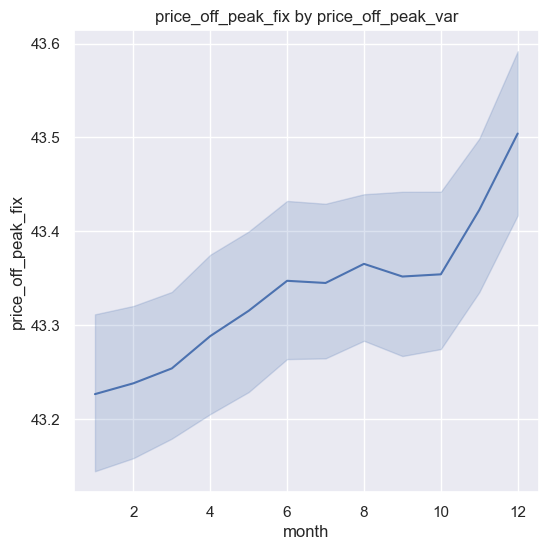

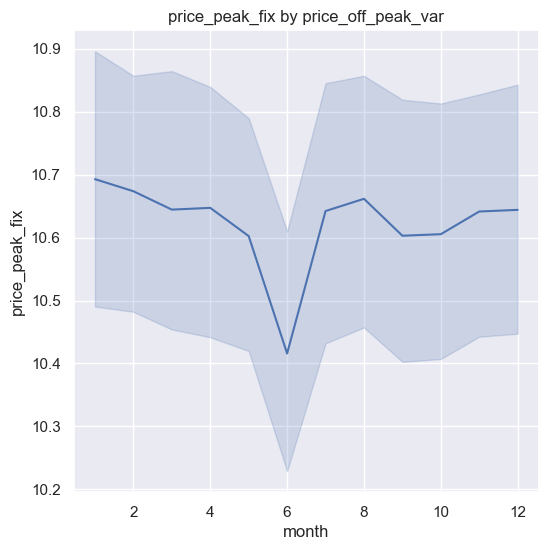

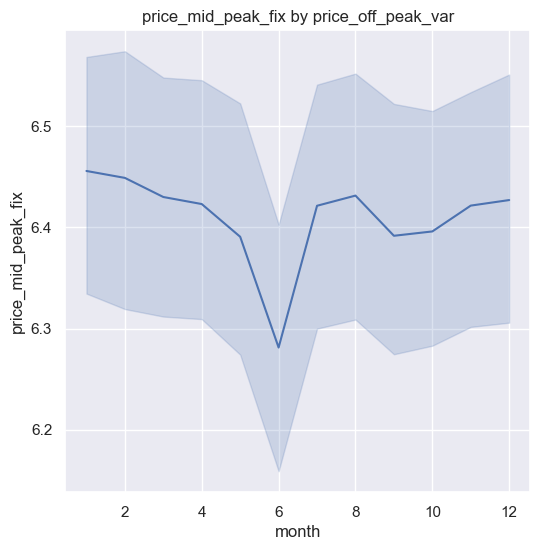

In [197]:

for y_column_name in numeric_columns_price.columns:
    plt.figure()
    sns.lineplot(y=y_column_name, x= "month", data=df_price)
    plt.title(f'{y_column_name} by {x_column_name}')
    plt.show()

### months with the highest number of contract terminations : February, October and November.

In [201]:
df_client["date_end"].dt.month.value_counts().sort_values(ascending = False)

date_end
2     1391
10    1385
11    1374
6     1350
12    1327
3     1260
8     1140
9     1137
7     1110
5     1093
1     1046
4      993
Name: count, dtype: int64

## There appears to be no connection between the months and the contract end dates. Furthermore, it is unclear if this column shows the service contract's expiry date or the date of churn.